In [51]:
#pip install opencv-python

In [52]:
#pip install pillow

In [53]:
# import all requried libraries
# open cv i.e cv2 is used to read image data
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import PIL
import os
import pathlib
from sklearn.model_selection import train_test_split

# Data Importing

In [54]:
# URL of the dataset 
dataset_url= "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [55]:
# to save into particular folder  
data_dir= tf.keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar= "True")

In [56]:
# datatset is created in the folder 
data_dir

'.\\datasets\\flower_photos'

In [57]:
# TO access the flowers_photots folder in jupyter 
data_path= pathlib.Path(data_dir)

In [58]:
data_path

WindowsPath('datasets/flower_photos')

In [59]:
# Access all flowers floder in flowers_path
# 'glob' is used for "all folder"
# "*/*" represents sub folder.
# "*/*.jpg" used to access all image in the sub folder with jgp extension

list(data_path.glob('*/*.jpg'))

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/102841525_bd6628ae3c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1031799732_e7f4008c03.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10391248763_1d16681106_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437754174_22ec990b77_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437770546_8bb6f7bdd3_m.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466290366_cc72e33532.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10466558316_a7198b87e2.jpg'),
 WindowsPath('datasets/flower_photos/daisy/1

In [60]:
# here all the images for all the sub folders are accessed
len(list(data_path.glob('*/*.jpg')))

3670

In [61]:
# to only access the rose folder
roses= list(data_path.glob('roses/*.jpg'))

In [62]:
roses[0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [63]:
len(roses)

641

# PILLOW
Used to view images

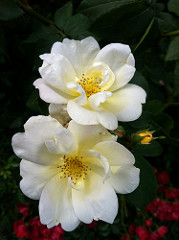

In [64]:
# pillow library is used directly to show image in particular folder
# open is used to specifically access path of image
PIL.Image.open(roses[0])

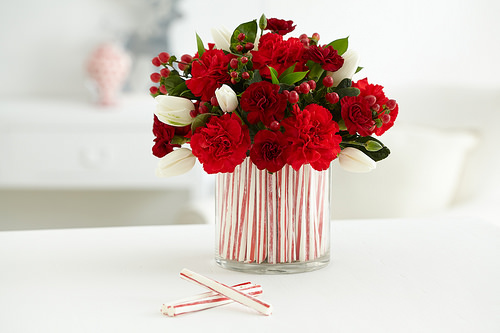

In [65]:
PIL.Image.open(roses[120])

# Data Cleaning

In [66]:
# Here inputs are names of the flowers and output are there values.
# This dict is for output
flower_names={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [67]:
flower_names

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}

In [68]:
# import all the flowers folder into there particular variable
# this dict is for input
flower_image_dict={
    'roses':list(data_path.glob('roses/*.jpg')),
    'daisy':list(data_path.glob('daisy/*.jpg')),
    'dandelion':list(data_path.glob('dandelion/*.jpg')),
    'sunflowers':list(data_path.glob('sunflowers/*.jpg')),
    'tulips':list(data_path.glob('tulips/*.jpg')),
}

In [69]:
flower_image_dict

{'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
  WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'),
  WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'),
  WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'),
  WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'),
  WindowsPath('

In [70]:
flower_image_dict['sunflowers'][3]

WindowsPath('datasets/flower_photos/sunflowers/10386503264_e05387e1f7_m.jpg')

In [71]:
str(flower_image_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [72]:
# TO convert images into an array
# "imread" reads the image data properly its dimension, pixels etc.
# 'cv2' takes input in the string fromat
img= cv2.imread(str(flower_image_dict['roses'][11]))

In [73]:
img.shape

(256, 320, 3)

In [74]:
np.ndim(img)

3

In [75]:
# TO make all the images in same size.
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [76]:
# To get all the images in a particular variable.
for i in flower_image_dict:
    print(i,":",flower_image_dict)

roses : {'roses': [WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'), WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'), WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'), WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'), WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg'), WindowsPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), WindowsPath('datasets/flower_photos/roses/11233672494_d8bf0a3dbf_n.jpg'), WindowsPath('datasets/flower_photos/roses/11694025703_9a906fedc1_n.jpg'), WindowsPath('datasets/flower_photos/roses/118974357_0faa23cce9_n.jpg'), WindowsPath('datasets/flower_photos/roses/11944957684_2cc806276e.jpg'), WindowsPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'), WindowsPath('datasets/flower_photos/roses/12165480946_c4a3fe182d_n.jpg'), WindowsPath('datasets/flower_photos/roses/12202373204_34fb07205b.jpg'), WindowsPath('datasets/flower_ph

In [77]:
X=[]
y=[]

In [78]:
# Now extract the this one by one and convert it to the array.
# To read and resize all the images.
for flower_name,  images in flower_image_dict.items():
    for image in images:
        img= cv2.imread(str(image))
        resized=cv2.resize(img,(180,180))
        X.append(resized)
        y.append(flower_names[flower_name])

In [79]:
len(X)

3670

In [80]:
len(y)

3670

In [81]:
X

[array([[[ 1, 16,  7],
         [ 1, 16,  7],
         [ 1, 17,  9],
         ...,
         [23, 50, 31],
         [25, 51, 32],
         [26, 52, 33]],
 
        [[10, 23, 15],
         [10, 23, 15],
         [ 9, 22, 14],
         ...,
         [20, 44, 30],
         [23, 47, 33],
         [26, 50, 36]],
 
        [[13, 20, 13],
         [12, 20, 13],
         [11, 19, 12],
         ...,
         [21, 43, 30],
         [22, 45, 31],
         [25, 48, 34]],
 
        ...,
 
        [[12, 24, 18],
         [11, 22, 15],
         [12, 21, 11],
         ...,
         [ 7, 14,  7],
         [ 2,  8,  2],
         [ 0,  2,  0]],
 
        [[19, 30, 28],
         [16, 26, 21],
         [14, 22, 15],
         ...,
         [ 3, 12,  2],
         [ 0,  8,  1],
         [ 0,  6,  1]],
 
        [[11, 21, 20],
         [17, 25, 24],
         [21, 28, 23],
         ...,
         [ 1, 12,  2],
         [ 2, 10,  3],
         [ 3, 10,  4]]], dtype=uint8),
 array([[[13, 18, 17],
         [11, 13, 1

In [82]:
X=np.array(X)
y=np.array(y)

In [33]:
X= X/255

# Train_Test_Split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [35]:
X_train.shape

(2936, 180, 180, 3)

In [36]:
X_test.shape

(734, 180, 180, 3)

In [37]:
X_train = X_train/255
X_test = X_test/255

# Applying CNN and ANN

In [38]:
cnn= keras.Sequential([
    keras.layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(180,180,3)),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])

In [39]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [40]:
# To get accuracy of the training samples
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5


92/92 [==============================] - 34s 337ms/step - loss: 1.6031 - Accuracy: 0.2371
Epoch 2/5
92/92 [==============================] - 33s 355ms/step - loss: 1.5998 - Accuracy: 0.2473
Epoch 3/5
92/92 [==============================] - 34s 368ms/step - loss: 1.5995 - Accuracy: 0.2473
Epoch 4/5
92/92 [==============================] - 35s 380ms/step - loss: 1.5995 - Accuracy: 0.2473
Epoch 5/5
92/92 [==============================] - 33s 364ms/step - loss: 1.5996 - Accuracy: 0.2473


In [41]:
# To get the accuracy of the testing sample
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 3s 109ms/step - loss: 1.6056 - Accuracy: 0.2343


[1.6056421995162964, 0.23433242738246918]

# Data Augmentation

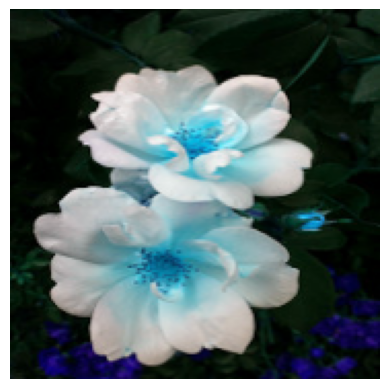

In [83]:
# plt.axis is used to remove the axis
plt.axis('off')
plt.imshow(X[0])
plt.show()

In [84]:
# FOR Zoom
data_augmentation= keras.layers.experimental.preprocessing.RandomZoom(0.5)

In [85]:
data_augmentation

In [86]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[8.9278884e-02, 3.0415092e+00, 9.5431709e-01],
        [5.4848626e-02, 3.7263279e+00, 2.0063782e-01],
        [2.0418366e-02, 3.3555927e+00, 0.0000000e+00],
        ...,
        [3.3857052e+00, 1.3431388e+01, 1.4313880e+00],
        [3.6806450e+00, 1.3707996e+01, 1.7263279e+00],
        [2.9958277e+00, 1.2954319e+01, 1.0415108e+00]],

       [[1.5622072e+00, 2.9726486e+00, 9.5431709e-01],
        [9.5974445e-01, 2.5214024e+00, 2.0063782e-01],
        [3.5728174e-01, 1.8482342e+00, 0.0000000e+00],
        ...,
        [2.3751106e+00, 1.3174473e+01, 1.1744728e+00],
        [1.7220402e+00, 1.2200638e+01, 5.2140236e-01],
        [2.1732852e+00, 1.1446960e+01, 9.7264743e-01]],

       [[8.7349874e-01, 1.8482342e+00, 9.5431709e-01],
        [5.3663534e-01, 1.0945549e+00, 2.0063782e-01],
        [8.1148165e-01, 9.5258534e-01, 3.0585486e-01],
        ...,
        [1.9887469e+00, 1.2129851e+01, 7.4155915e-01],
        [2.1957598e+00

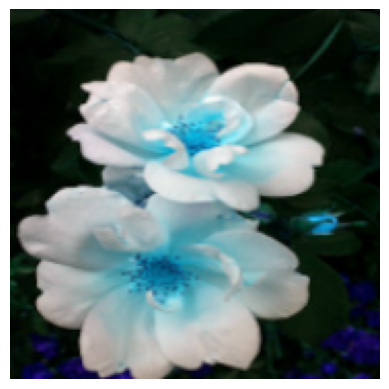

In [87]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

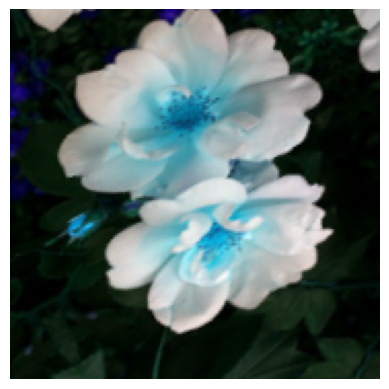

In [89]:
# For Rotation 
data_augmentation = keras.layers.experimental.preprocessing.RandomRotation(0.5)
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

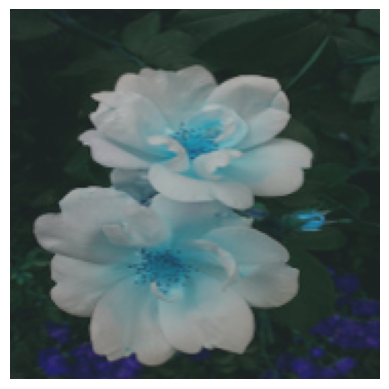

In [90]:
# For Contrast
data_augmentation = keras.layers.experimental.preprocessing.RandomContrast(0.5)
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
plt.show()

In [47]:
data_augumentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [48]:
cnn= keras.Sequential([
    data_augumentation,
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,3,padding="same",activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(5,activation="sigmoid")
])

In [49]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [88]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
92/92 [==============================] - 31s 336ms/step - loss: 1.6002 - Accuracy: 0.2473
Epoch 2/5
92/92 [==============================] - 37s 399ms/step - loss: 1.6004 - Accuracy: 0.2473
Epoch 3/5
92/92 [==============================] - 35s 376ms/step - loss: 1.6002 - Accuracy: 0.2473
Epoch 4/5
92/92 [==============================] - 39s 421ms/step - loss: 1.5999 - Accuracy: 0.2473
Epoch 5/5
92/92 [==============================] - 40s 433ms/step - loss: 1.5994 - Accuracy: 0.2473
